# Cryotherapy analysis

## Importing the libraries

In [1]:
#Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Library for Fscore
from sklearn.metrics import fbeta_score
#Libraray for Metrics
from sklearn import metrics 
#Library for AdaBoostClassifier
from sklearn.ensemble import AdaBoostClassifier
#Library for Train Test Split
from sklearn.model_selection import train_test_split

## Loading the Dataset and Knowing the attributes present

In [2]:
#Read the data and display few rows. Here dataset is in excel form
data = pd.read_excel('Cryotherapy.xlsx')
data.head()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
0,1,35,12.00,5,1,100,0
1,1,29,7.00,5,1,96,1
2,1,50,8.00,1,3,132,0
3,1,32,11.75,7,3,750,0
4,1,67,9.25,1,1,42,0


In [19]:
#Display Column names
data.columns

Index(['sex', 'age', 'Time', 'Number_of_Warts', 'Type', 'Area',
       'Result_of_Treatment'],
      dtype='object')

In [3]:
#Display the information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
sex                    90 non-null int64
age                    90 non-null int64
Time                   90 non-null float64
Number_of_Warts        90 non-null int64
Type                   90 non-null int64
Area                   90 non-null int64
Result_of_Treatment    90 non-null int64
dtypes: float64(1), int64(6)
memory usage: 5.0 KB


In [4]:
#Getting the number of rows and columns
data.shape

(90, 7)

In [5]:
#Describe the data
data.describe()

,sex,age,Time,Number_of_Warts,Type,Area,Result_of_Treatment
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,1.477778,28.600000,7.666667,5.511111,1.700000,85.833333,0.533333
std,0.502304,13.360852,3.406661,3.567155,0.905042,131.733153,0.501683
min,1.000000,15.000000,0.250000,1.000000,1.000000,4.000000,0.000000
25%,1.000000,18.000000,4.562500,2.000000,1.000000,20.000000,0.000000
50%,1.000000,25.500000,8.500000,5.000000,1.000000,70.000000,1.000000
75%,2.000000,35.000000,10.687500,8.000000,3.000000,100.000000,1.000000
max,2.000000,67.000000,12.000000,12.000000,3.000000,750.000000,1.000000


In [6]:
#Check the null values in the dataset
data.isnull().sum()

sex                    0
age                    0
Time                   0
Number_of_Warts        0
Type                   0
Area                   0
Result_of_Treatment    0
dtype: int64

From this we can get that there is no null variables

## EDA

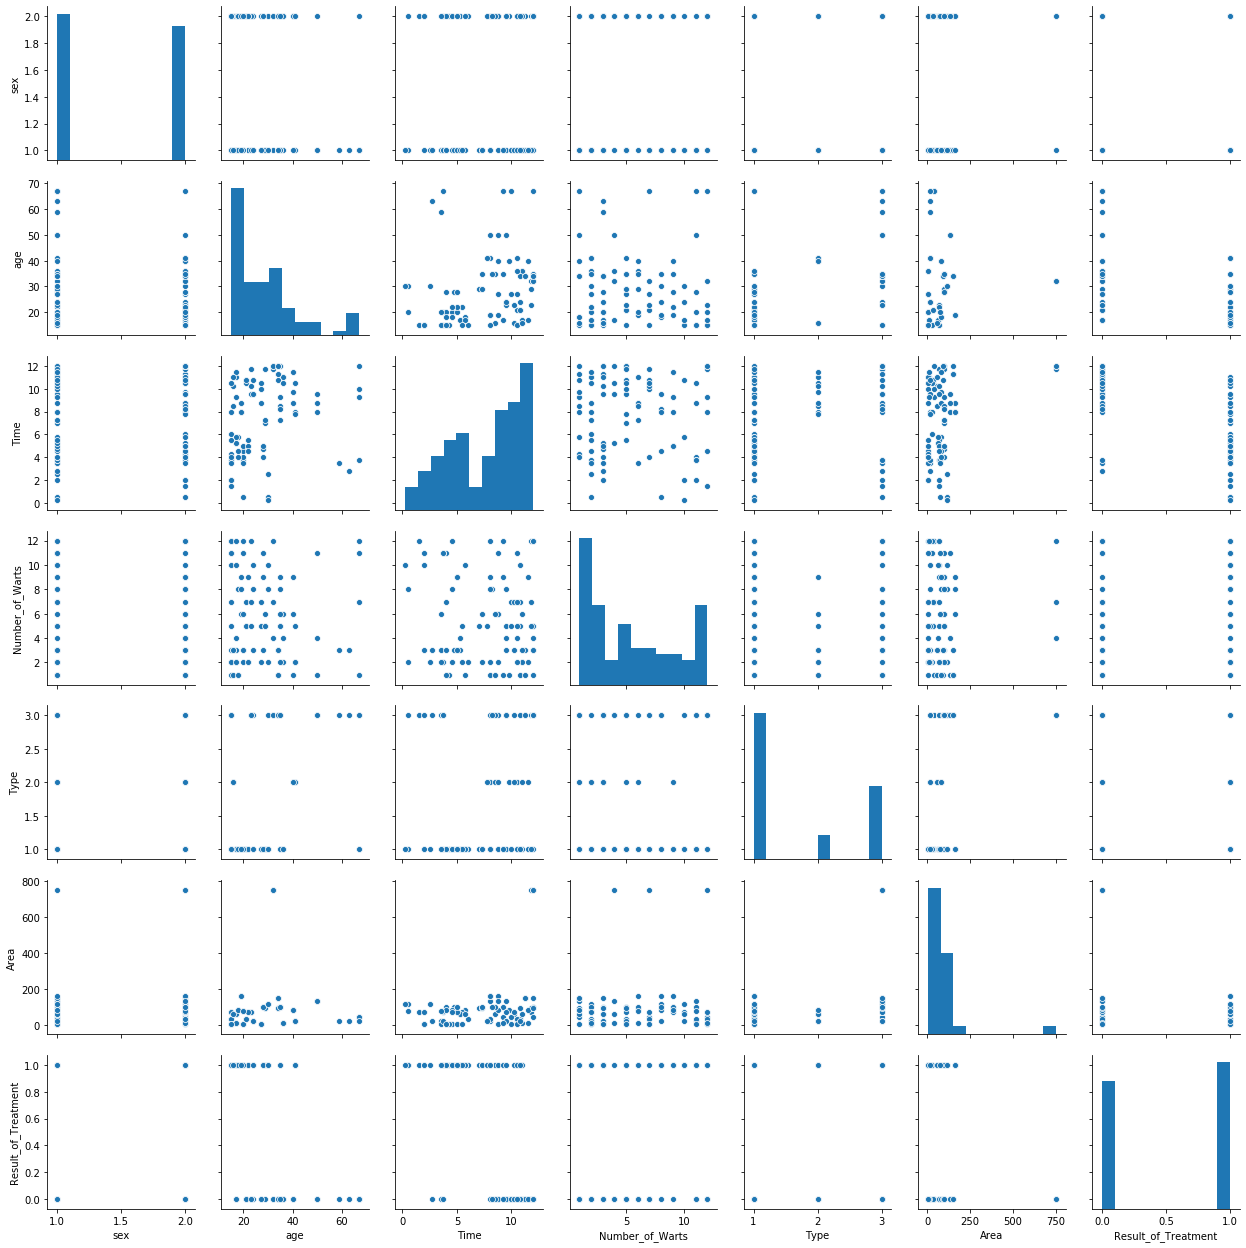

In [7]:
#Displaying pairplot of the data
sns.pairplot(data)

## Modelling

In [8]:
#Splitting the data_frame into features and target
target = data['Result_of_Treatment']
features = data.drop('Result_of_Treatment',axis=1)

In [9]:
#Function for evaluating the performance of the model. Here we will be using an fbeta_score as performance metric
def performance_metric(y_true,y_pred):
    
    score = fbeta_score(y_true,y_pred,beta=0.5)
    
    return score

In [10]:
#Creating test and train set of the data
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,train_size=0.8,random_state=10)

In [11]:
#Creating an instance of the Ada boost classifier
clf = AdaBoostClassifier()

In [12]:
#Fitting the model using the training data
clf.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [13]:
#Predicting against the input data
clf_pred = clf.predict(X_test)
print(clf_pred)

[0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 1 1]


In [14]:
#Estimating the performance of the metric
clf_score = performance_metric(y_test,clf_pred)

In [15]:
#Print The score
print('AdaBoost Classifier has a performance of {:.3f}'.format(clf_score))

AdaBoost Classifier has a performance of 0.982


In [16]:
#Printing confusion matrix
confusion_matrix=metrics.confusion_matrix(y_test,clf_pred)

confusion_matrix

array([[ 6,  0],
       [ 1, 11]], dtype=int64)

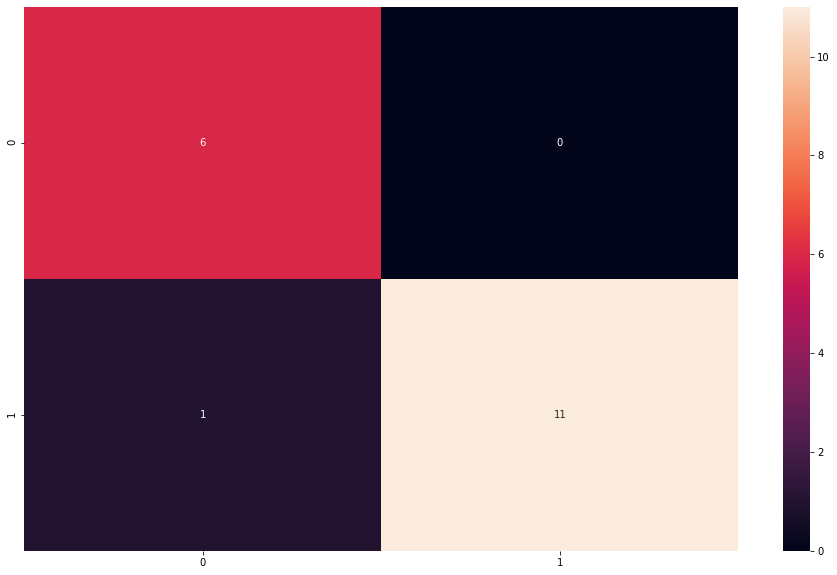

In [17]:
#Corelation matrix
plt.figure(figsize=(16,10))
sns.heatmap(confusion_matrix,annot=True,fmt='.0f')
plt.show()

### Observations:

We analysed the E Coli dataset and plotted graphs over the various attributes.

Our Predictions using Ada Boost Classifier:

Performance = 0.982